# K-Means Clustering

K-Means Clustering is an unsupervised learning algorithm used to group data points into clusters based on their similarity. Unlike supervised learning, unsupervised learning does not use labeled data. Instead, it identifies patterns or structures in the data without any prior knowledge of the target labels.

### Key Concepts of K-Means Clustering

1) Clusters: Groups of data points that are similar to each other.

2) Centroids: The center of a cluster, calculated as the mean of all data points in the cluster.

3) Objective: Minimize the within-cluster sum of squares (WCSS), which is the sum of squared distances between each data point and its centroid.

### Steps in K-Means Clustering

1) Initialize Centroids: Randomly select k data points as initial centroids.

2) Assign Data Points: Assign each data point to the nearest centroid.

3) Update Centroids: Recalculate the centroids as the mean of all data points in the cluster.

4) Repeat: Repeat steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Step 1: Generate synthetic data

def generate_data(n_samples, n_features, n_clusters, cluster_std):
    np.random.seed(42)
    centroids = np.random.rand(n_clusters, n_features) * 5      # random centroids
    X = []
    for i in range(n_clusters):
        points = np.random.rand(n_samples//n_clusters, n_features) * cluster_std + centroids[i]
        X.append(points)
    X = np.vstack(X)
    return X, centroids

In [3]:
# Step 2: Initialize centroids randomly 

def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices] 

In [5]:
# Step 3: Assign each data point to the nearest centroid 

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [17]:
# Step 4: Update centroids as the mean of assigned points
def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])  # Convert to NumPy array
    return new_centroids

In [15]:
# Step 5: K-Means algorithm

def kmeans(X, k, max_iters=100, tol=1e-4):
    # Initialize centroids 
    centroids = initialize_centroids(X, k)

    for i in range(max_iters):
        # Assign clusters 
        labels = assign_clusters(X, centroids) 

        # update centroids
        new_centroids = update_centroids(X, labels, k)

        # check for convergence 
        if np.linalg.norm(new_centroids-centroids) < tol:
            break

        centroids = new_centroids 
    
    return labels, centroids 

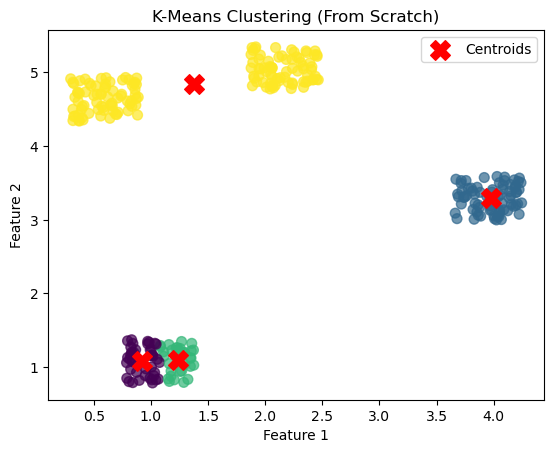

In [18]:
# Step 6: Visualize the results
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title("K-Means Clustering (From Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Main function
if __name__ == "__main__":
    # Generate synthetic data
    n_samples = 300
    n_features = 2
    n_clusters = 4
    cluster_std = 0.60
    X, true_centroids = generate_data(n_samples, n_features, n_clusters, cluster_std)
    
    # Run K-Means
    k = 4
    labels, centroids = kmeans(X, k)
    
    # Plot the results
    plot_clusters(X, labels, centroids)